In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(12288,20)
        self.hidden2 = nn.Linear(20,7)
        self.hidden3 = nn.Linear(7,5)
        self.hidden4 = nn.Linear(5,1)
    def forward(self,x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = torch.sigmoid(self.hidden4(x))
        return x


In [17]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    # your train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(
        train_dataset["train_set_y"][:])  # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    # your test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(
        test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [31]:
import h5py
import numpy as np
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

# Reshape the training and test examples
# The "-1" makes reshape flatten the remaining dimensions
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

In [6]:
print(train_x.shape)
print(train_y.shape)

(12288, 209)
(1, 209)


In [7]:
from torch.autograd import Variable

In [41]:
def test(pred,lab):
    a = torch.ones_like(pred)
    a[pred<=0.5] = 0
    b = torch.zeros_like(pred)
    b[a == lab] = 1
    return torch.mean(b.float())

In [44]:
pred = torch.tensor([1,1,0,0])
lab = torch.tensor([1,0,1,0])
print(test(pred,lab))

tensor(0.5000)


In [32]:
train_x = torch.from_numpy(train_x.T).float()
train_y = torch.from_numpy(train_y.T).float()
test_x = torch.from_numpy(test_x.T).float()
test_y = torch.from_numpy(test_y.T).float()
input = Variable(train_x)
test_x = Variable(test_x)

In [52]:
import matplotlib.pyplot as plt

In [48]:
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.0075)
optimizer.zero_grad()
num_iteration = 2500
criterion = nn.BCELoss()
cost = []
ac = []
for i in range(num_iteration):
    net.train()
    out = net(input)
    loss = criterion(out,train_y.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        cost.append(loss)
        test_out = net(test_x)
        accu = test(test_out,test_y)
        print("epoch:{}, loss:{}, accuracy:{}".format(i,loss.data.item(),accu))
        ac.append(accu)


epoch:0, loss:0.7099683880805969, accuracy:0.6600000262260437
epoch:100, loss:0.6739333868026733, accuracy:0.3400000035762787
epoch:200, loss:0.6540575623512268, accuracy:0.3400000035762787
epoch:300, loss:0.644675612449646, accuracy:0.3400000035762787
epoch:400, loss:0.640845775604248, accuracy:0.3400000035762787
epoch:500, loss:0.636213481426239, accuracy:0.3400000035762787
epoch:600, loss:0.6275664567947388, accuracy:0.3400000035762787
epoch:700, loss:0.6097381711006165, accuracy:0.3400000035762787
epoch:800, loss:0.5822950005531311, accuracy:0.3400000035762787
epoch:900, loss:0.5453664660453796, accuracy:0.3400000035762787
epoch:1000, loss:0.4945284128189087, accuracy:0.5600000023841858
epoch:1100, loss:0.4272421896457672, accuracy:0.6200000047683716
epoch:1200, loss:0.4152795672416687, accuracy:0.46000000834465027
epoch:1300, loss:0.3871017098426819, accuracy:0.5
epoch:1400, loss:0.3424137830734253, accuracy:0.5199999809265137
epoch:1500, loss:0.30817532539367676, accuracy:0.56000

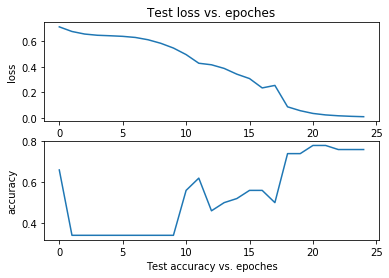

In [54]:
plt.subplot(2,1,1)
plt.plot(cost)
plt.title("Test loss vs. epoches")
plt.ylabel("loss")
plt.subplot(2,1,2)
plt.plot(ac)
plt.xlabel("Test accuracy vs. epoches")
plt.ylabel("accuracy")
plt.show()
